# HW2 ICA
- Author: Yuege Xie (EID:yx4256)
- Python version: Python 3
- CS 391L Machine Learning HW2

In [1]:
# import packages
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
np.random.seed(1023)
# check the python version
from platform import python_version
print("Current python version is {}".format(python_version()))
%matplotlib inline

Current python version is 3.6.9


In [2]:
def plot_signals(Sig, filename, per=False):
    if per != False:
        Sig = Sig[per]
    plt.figure(figsize=(8,3))
    for i in range(Sig.shape[0]):
        rescale = (Sig[i,:]-np.min(Sig[i,:]))/(np.max(Sig[i,:]) - np.min(Sig[i,:]))
        plt.plot(rescale+i*1.5)
    plt.xlabel("time")
    plt.ylabel("signals")
    plt.title(filename)
    plt.tight_layout()
    plt.savefig('./'+filename+'.pdf')
    plt.show()

In [3]:
def mix_signals(S, A):
    X = A.dot(S)
    return X

In [4]:
def recover(X, up, eta, seed, iteration):
    np.random.seed(seed)
    W = np.random.uniform(0, up, (X.shape[0], X.shape[0]))
    for i in range(iteration):
        W_pre = W
        Y = W.dot(X)
        Z = 1.0/(1.0+np.exp(-Y))
        grad = X.shape[1]*W+ (1-2*Z).dot(Y.T).dot(W)
        W = W + eta*grad
        
        gradn = la.norm(grad, 'fro')
        assert not math.isnan(gradn)
        
        if gradn < 1e-12 or la.norm(W-W_pre, 'fro') <1e-12 :
            print("Early break at iteration: {}; gradient norm: {}".format(i+1, gradn))
            break
        if (i+1)%(iteration//10) == 0:
            print("iteration: {}; gradiant norm: {}".format(i+1, gradn))
    recover = W.dot(X)
    return recover, W

## Test with "icaTest.mat"

In [5]:
# read data---thanks to the post on piazza
from scipy.io import loadmat
test = loadmat('./icaTest.mat')

In [6]:
X_test = mix_signals(test['U'], test['A'])
recover_test, W_test = recover(X_test, 0.1, 0.01, seed=88, iteration=1000000)

Early break at iteration: 379; gradient norm: 9.855071496072352e-11


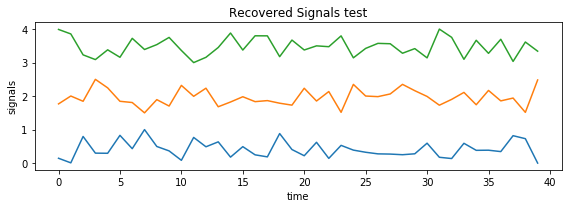

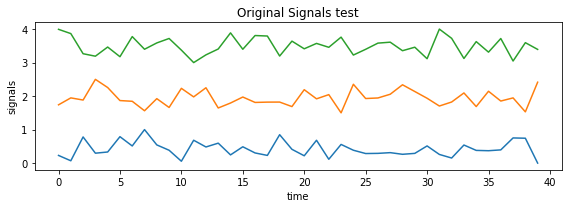

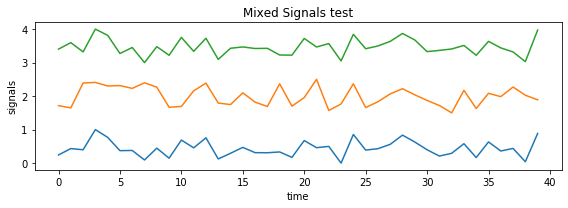

In [7]:
pert = [1,2,0]
plot_signals(recover_test, "Recovered Signals test", pert)
plot_signals(test['U'], "Original Signals test")
plot_signals(X_test, "Mixed Signals test")

In [8]:
print("Correlations between orignal and recovered signals of test set:")
for i in range(3):
    print( "singal {}: {}".format(i, np.corrcoef(recover_test[pert[i]], test['U'][i])[1,0]))

Correlations between orignal and recovered signals of test set:
singal 0: 0.9866785786048746
singal 1: 0.988386527240567
singal 2: 0.991185036478111


In [9]:
np.corrcoef(test['U'])

array([[ 1.        , -0.42146365, -0.42193968],
       [-0.42146365,  1.        , -0.48858069],
       [-0.42193968, -0.48858069,  1.        ]])

In [10]:
np.corrcoef(recover_test)

array([[ 1.        , -0.50842141, -0.51647105],
       [-0.50842141,  1.        , -0.45067516],
       [-0.51647105, -0.45067516,  1.        ]])

## Test with "sounds.mat"

In [11]:
S = loadmat('./sounds.mat')['sounds']
np.corrcoef(S)

array([[ 1.        , -0.0053306 , -0.00315613,  0.00549875, -0.00383568],
       [-0.0053306 ,  1.        ,  0.00123874,  0.00698466, -0.00109667],
       [-0.00315613,  0.00123874,  1.        , -0.01758172,  0.00801588],
       [ 0.00549875,  0.00698466, -0.01758172,  1.        ,  0.00502297],
       [-0.00383568, -0.00109667,  0.00801588,  0.00502297,  1.        ]])

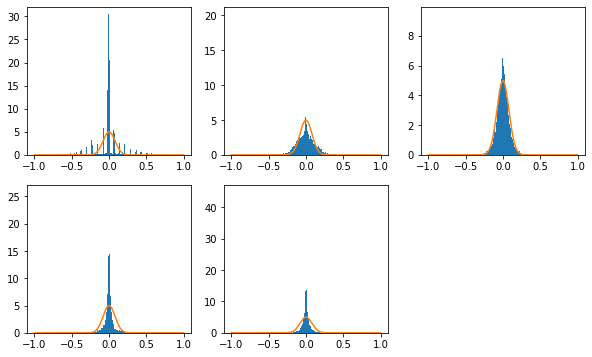

In [12]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
x_axis = np.arange(-1, 1, 0.001)
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.hist(S[i,:], bins=1000, density=True)
    plt.plot(x_axis, 1*norm.pdf(x_axis,0,0.08))
plt.savefig("distributions.pdf")

In [13]:
A = np.random.randn(S.shape[0], S.shape[0])
X = mix_signals(S, A)
rec_sig, W_iter = recover(X, 0.1, 0.00001, seed=88, iteration=100000)

Early break at iteration: 582; gradient norm: 9.669027651894986e-08


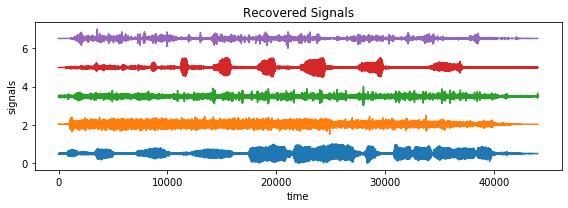

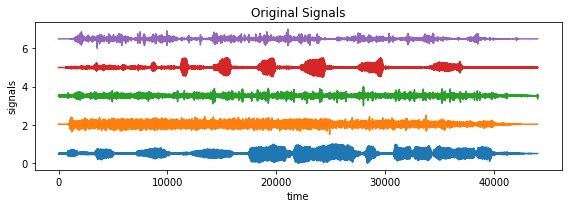

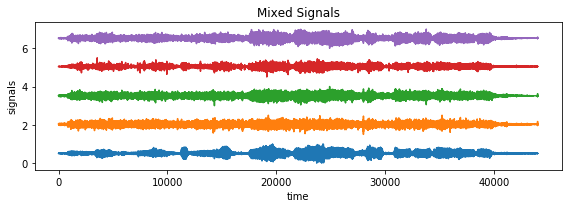

In [14]:
per = [3,1,4,2,0]
plot_signals(rec_sig, "Recovered Signals", per)
plot_signals(S, "Original Signals")
plot_signals(X, "Mixed Signals")

Correlations between orignal and recovered signals of sound set:
singal 0: 0.9999649090932449
singal 1: 0.9999279577812625
singal 2: -0.99986749543762
singal 3: 0.9999379639280448
singal 4: -0.9999383517240533


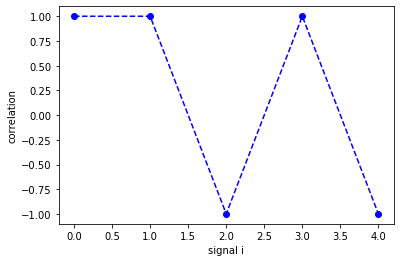

In [15]:
print("Correlations between orignal and recovered signals of sound set:")
cor = []
for i in range(5):
    cori = np.corrcoef(rec_sig[per[i]], S[i])[1,0]
    cor.append(cori)
    print( "singal {}: {}".format(i, cori))
    
plt.plot(cor, 'bo--')
plt.xlabel("signal i")
plt.ylabel("correlation")
plt.savefig("corplot.pdf")
plt.show()

In [16]:
print(np.corrcoef(rec_sig))

[[ 1.00000000e+00 -1.57430481e-03 -2.05467443e-03  8.02515027e-04
   1.83378606e-03]
 [-1.57430481e-03  1.00000000e+00  1.09168410e-03 -6.95436219e-04
   1.22378966e-03]
 [-2.05467443e-03  1.09168410e-03  1.00000000e+00  1.58994994e-03
   2.08975775e-03]
 [ 8.02515027e-04 -6.95436219e-04  1.58994994e-03  1.00000000e+00
  -3.05699948e-04]
 [ 1.83378606e-03  1.22378966e-03  2.08975775e-03 -3.05699948e-04
   1.00000000e+00]]
